<h1><center>Simulation dataset applied to SPINDLE method.</center></h1>


### Abstract

To our knowledge in the literature the activation functions and the normalizers are fixed functions including linear, Heaviside-step, ReLU, tanh and logistic, etc. No neural network considers the trainability of the activation function during backpropagation. However, when the inputs of the activation functions are not typically uniformly (or normally) distributed, the linear/ReLU (or tanh/logistic) will not be the best normalizers, such that the simple truncation will not the effective quantizer. As our study, the best normalizing activation function is the general error function $gef(x)$ of the input distribution, namely, the cumulative distribution function. Only when the input distribution is a Gaussian function, the best activation is the error function $erf(x)$, which can be approximated by a logistic function. Especially when the inputs are sensed signals or pre-extracted features from different datasets, the input distributions will be no more normal, so that the activation functions should be fine-turned during backpropagation. Obviously the look-up tables can be updated for any functions. However, RAM-based tables are consuming a large overhead and range-addressable lookup tables (RALUT) will be inefficient to adjust their boundaries and slopes. In this we propose a ReLU array called Spindle for solving this issue. The proposed Spindle is effective and efficient for training, especially for quantized neural networks.

C:\Users\E411\AppData\Local\Temp\ipykernel_13812\759439131.py:68: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Xall)
C:\Users\E411\AppData\Local\Temp\ipykernel_13812\759439131.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Xall, rug=True, hist=False, color='red')


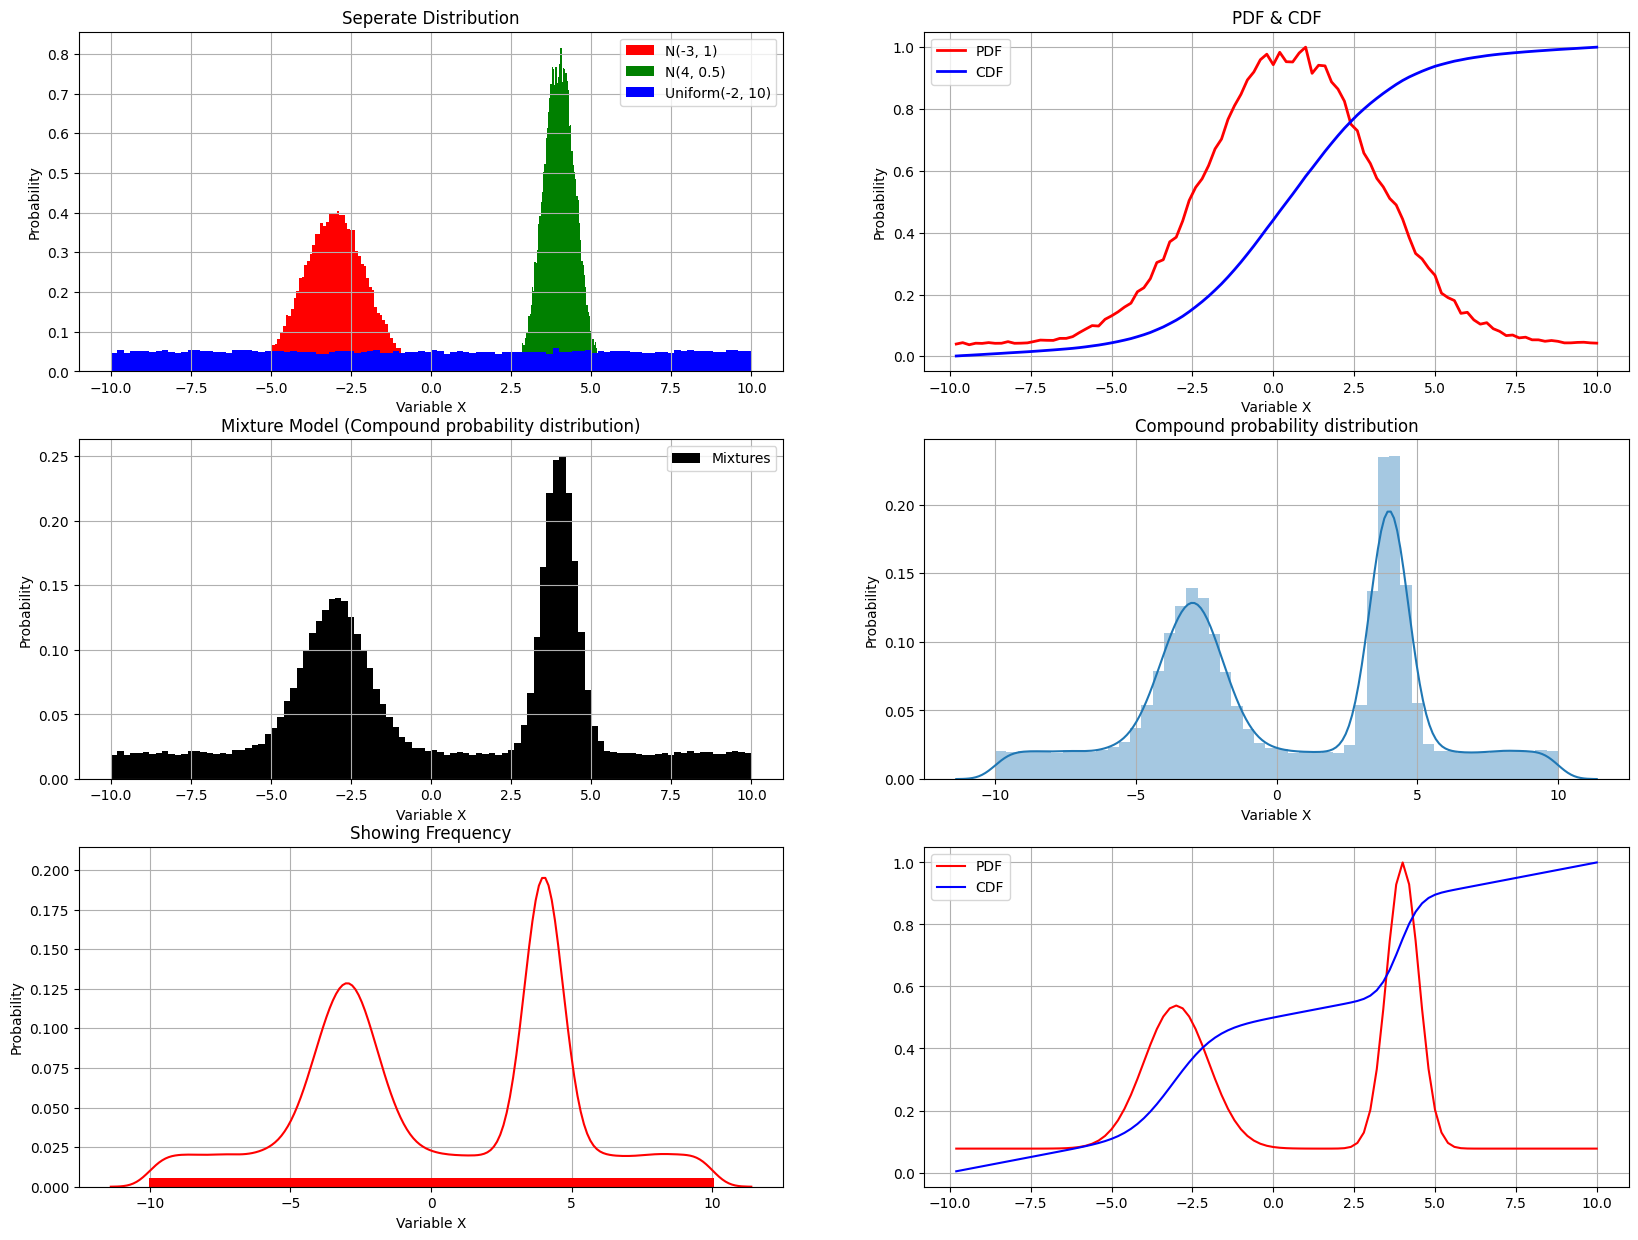

In [1]:
# block 1: 資料產生/模擬器
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import random
import math
import seaborn as sns

np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=100000, suppress=True)
N = 10**5

r1, r2, r3 = 0.3, 0.3, 0.4
mean1, dev1, N1 = -3, 1, int(r1*N)
mean2, dev2, N2 = 4, 0.5, int(r2*N)
L, R, N3 = -10, 10, int(r3*N)

np.random.seed(1)
# 第一張圖
f1 = plt.figure(figsize=(20,15))
ax1 = f1.add_subplot(321)
Xn1 = np.random.normal(mean1, dev1, N1)
count1, bins1, ignored1 = plt.hist(Xn1, 100,density=True, stacked=True, color='r', label="N(-3, 1)") 
Xn2 = np.random.normal(mean2, dev2, N2)
count2, bins2, ignored2 = plt.hist(Xn2, 100, density=True, stacked=True, color='g', label="N(4, 0.5)") 
Xu3 = np.random.uniform(L, R, N3)
count3, bins3, ignored3 = plt.hist(Xu3, 100, density=True, stacked=True, color='b', label="Uniform(-2, 10)")

plt.legend()
plt.title("Seperate Distribution")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第二張圖
# sum of counts ??
count = r1*count1 + r2*count2 + r3*count3
count = count1 + count2 + count3
# X的數量取決於bin3
X = bins3[1:]
pdfX = count/sum(count)
cdfX = np.cumsum(pdfX)
ax2 = f1.add_subplot(322)
ax2.plot(X, pdfX/np.max(pdfX), linewidth=2, color='r', label="PDF")
ax2.plot(X, cdfX, linewidth=2, color='b', label="CDF")
plt.legend()
plt.title("PDF & CDF")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第三張圖
# Compound Misture
ax3 = f1.add_subplot(323)
Xall = np.concatenate((Xn1, Xn2, Xu3), axis=None)
freq, binsall, ignored = plt.hist(Xall, 100, density=True, stacked=True, color='k', label="Mixtures")
plt.legend()
plt.title("Mixture Model (Compound probability distribution)")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第四張圖
# Shown by seaborn
ax4 = f1.add_subplot(324)
ax = sns.distplot(Xall)
plt.title("Compound probability distribution")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第五張圖
# Shown Frequency
ax5 = f1.add_subplot(325)
ax = sns.distplot(Xall, rug=True, hist=False, color='red')
plt.title("Showing Frequency")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第六張圖
# By professor coding
ax6 = f1.add_subplot(326)
pdf1 = 1/(dev1*np.sqrt(2*np.pi))*np.exp(-(X-mean1)**2/(2*dev1**2))
pdf2 = 1/(dev2*np.sqrt(2*np.pi))*np.exp(-(X-mean2)**2/(2*dev2**2))
pdf3 = np.ones(X.size)/(R-L)
pdf_merge  = r1 * pdf1 + r2 * pdf2 + r3 * pdf3
cdf_merge = np.cumsum(pdf_merge)
ax6.plot(X, pdf_merge/np.max(pdf_merge), color="r", label="PDF")
ax6.plot(X, cdf_merge/sum(pdf_merge), color="b",label="CDF")
plt.legend()
plt.grid(True)

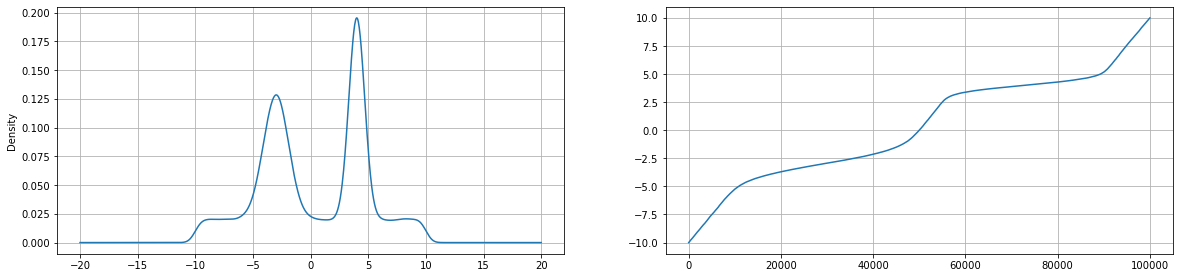

In [2]:
#我用核密度曲線驗證過，雙峰才是對的。
%matplotlib inline
pd.set_option("display.max_rows", 1000)    
pd.set_option("display.max_columns", 1000) 
f1 = plt.figure(figsize=(20,10))
ax1 = f1.add_subplot(221)
Xall = np.sort(Xall)
Xall_pd = pd.Series(Xall)
Xall_pd.plot(kind='kde')
plt.grid(True)

ax2 = f1.add_subplot(222)
Xall = np.sort(Xall)
Xall_pd = pd.Series(Xall)
Xall_pd.plot()
plt.grid(True)

X-axis Interval: [0.000489 0.000489 0.000489 ... 0.000489 0.000489 0.000489]
Y-axis Interval: [0.079079 0.053164 0.009765 ... 0.018744 0.040994 0.018085]


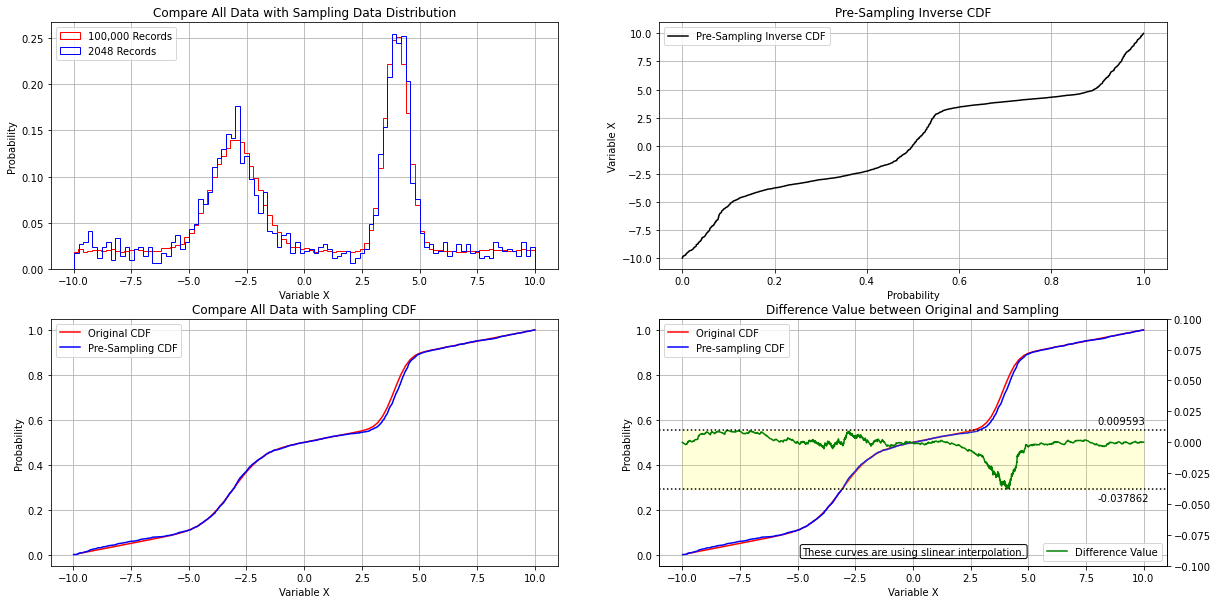

In [3]:
# Inverse transform sampling method:
# Creating a random number generator for arbitrary distributions.
# Suppose we have some random samples with an unknown distribution.
# We can still use the inverse transform method to create a random number generator
# from a random sample, by estimating the inverse CDF function using interpolation(插值法).
# 也就是求𝑥=𝐶𝐷𝐹^(−1)(𝑢), 𝑢 是 python 產生的均勻分布函數 0.0 < rand() < 1

from scipy.interpolate import interp1d
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(Xall)
inv_cdf = interp1d(ecdf.y, ecdf.x, bounds_error=False, assume_sorted=True)

# block 2: 預取樣
np.random.seed(10)
u = np.random.uniform(0, 1, 2048)
xs = np.linspace(0, 1, 2048)
ys = inv_cdf(u)

# block 3: 排序
ys = np.sort(ys)
norm_cdf = cdf_merge/sum(pdf_merge)

# 第一張圖
f1 = plt.figure(figsize=(20,10))
ax1 = f1.add_subplot(221)
ax1.hist(Xall, 100, histtype='step', color='r', density=True, label="100,000 Records")
ax1.hist(ys, 100, histtype='step', color='b', density=True, label="2048 Records")
plt.title("Compare All Data with Sampling Data Distribution")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.legend(loc=2)
plt.grid(True)

# block 4 : CDF^(-1)
# 第二張圖
ax2 = f1.add_subplot(222)
ax2.plot(xs, ys, color="black", label="Pre-Sampling Inverse CDF")
plt.title("Pre-Sampling Inverse CDF")
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

# 第三張圖
ax3 = f1.add_subplot(223)
ax3.plot(X, norm_cdf, color="r", label="Original CDF")
ax3.plot(ys, xs, color="b", label="Pre-Sampling CDF")
plt.title("Compare All Data with Sampling CDF")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.legend()
plt.grid(True)

# 第四張圖
ax4 = f1.add_subplot(224)

f1 = interp1d(X, norm_cdf, kind="slinear", fill_value="extrapolate")
f2 = interp1d(ys, xs, kind="slinear", fill_value="extrapolate")
x1new = np.linspace(-10,10,10000)
y1new = f1(x1new)
y2new = f2(x1new)
ax4.plot(X, norm_cdf, color="r", label="Original CDF")
ax4.plot(ys, xs, color="b", label="Pre-sampling CDF")
ax4.text(-4.8,0,"These curves are using slinear interpolation.",fontsize=10, 
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.2'))

plt.legend()
plt.grid(True)
plt.title("Difference Value between Original and Sampling")
plt.ylabel("Probability")
plt.xlabel("Variable X")

ax5 = ax4.twinx()
ax5.plot(x1new, (y2new-y1new), color="g", label="Difference Value")
ax5.axhline(y = max(y2new-y1new), color='black', linestyle=":")
ax5.axhline(y = min(y2new-y1new), color='black', linestyle=":")
ax5.text(8, max(y2new-y1new)+0.005, round(max(y2new-y1new),6))
ax5.text(8, min(y2new-y1new)-0.01, round(min(y2new-y1new),6))
ax5.fill_between(x1new, max(y2new-y1new), min(y2new-y1new), alpha = 0.15, color='yellow')
ax5.set_ylim(-0.1,0.1)
plt.legend(loc=4)

def intr(data):
    intr = np.diff(data,axis=0)
    return np.around(intr,6)

print("X-axis Interval:", intr(xs))
print("Y-axis Interval:", intr(ys))

In [4]:
# block 5 : PWL LUT
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def pointfunction(data):
    return fx(data)    

def pointslope(m,bias,data):  
    return (2**m) * data + bias

def intercept(data):
    return pointfunction(data)-pointslope(m,bias,data)

# 由給定數據點集 (x,y) 求插值函數 fx
fx = interp1d(xs, ys, kind='slinear', fill_value="extrapolate")
# 由插值函數 fx 計算插值點的函數值
xInterp = np.linspace(0,1,10*100000) # 指定需插值的數據點集 xInterp
yInterp = fx(xInterp) # 調用插值函數 fx，計算 xInterp

# f1 = plt.figure(figsize=(20,10))
# plt.plot(norm_cdf, X, color="r", label="Original CDF")
# plt.plot(xInterp, yInterp, color="b", label="linear interpolate")
# plt.grid(True)
# plt.ylabel("Probability")
# plt.xlabel("Variable X")
# plt.legend()
# plt.show()

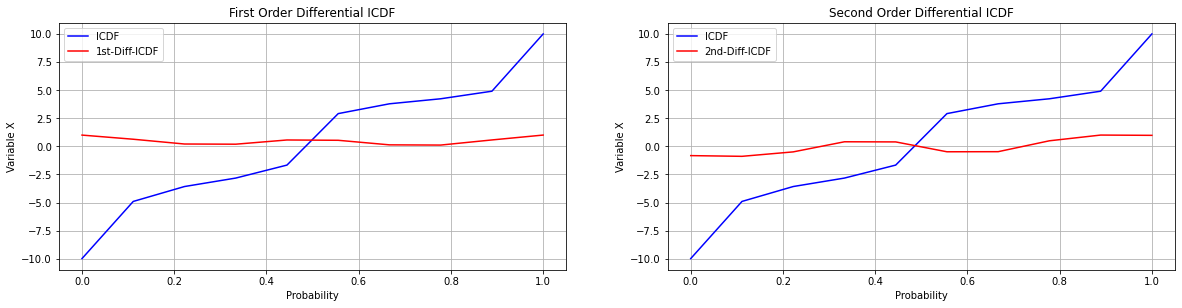

In [52]:
# R=Right L=left W=Width N=Number
L, R = 0,1
W = R - L
N = 10
X1 = np.linspace(L, R, N)

# d=differential
d1= np.gradient(pointfunction(X1))
d2= np.gradient(np.gradient(pointfunction(X1)))

# plot
f1 = plt.figure(figsize=(20,10))
ax1 = f1.add_subplot(221)
ax1.plot(X1,pointfunction(X1), color="b", label="ICDF")
ax1.plot(X1,d1/np.max(d1), color="r", label="1st-Diff-ICDF")
plt.title("First Order Differential ICDF")
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

ax2 = f1.add_subplot(222)
ax2.plot(X1,pointfunction(X1), color="b", label="ICDF")
ax2.plot(X1,d2/np.max(d2), color="r", label="2nd-Diff-ICDF")
plt.title("Second Order Differential ICDF")
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

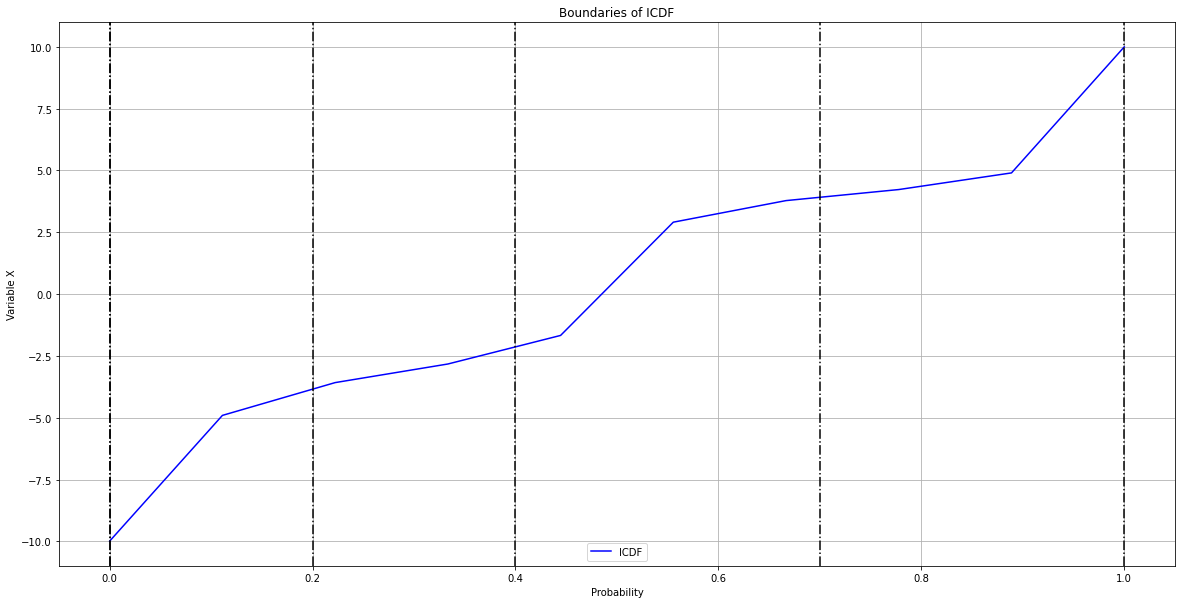

In [53]:
# ep=endpoint
eps_d2 = np.where(np.diff(np.sign(np.diff(d2))))[0]
boundary = np.append([0],[N])
All_b = np.sort(np.concatenate((boundary, eps_d2)))
All_b = L+(All_b*W)/N

# setting figsize
f1 = plt.figure(figsize=(20,10))
plt.plot(X1,pointfunction(X1), color="b", label="ICDF")
for i, j in enumerate(All_b, 1):
    plt.axvline(x = j, color='black', linestyle="-.")
    
plt.title('Boundaries of ICDF')
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

In [58]:
# p = precision, n(nR,nL) = new, m = slpoe, c = center
# ans = approximate solution
# list1 = temp list 1. and so on. ev = error value
# for range of area, ud=undo

p = 0.001
ans = []
area = 0
error_rate = 0.03

for i in range(len(All_b)-1):
    list1, list2, list3, ud_area = [], [], [], []
    area += 1
    list2_ev = 1
    bL = All_b[i]
    bR = All_b[i+1]
    nL = bL
    nR = bR
    ud_area.append([bL,bR])
    print("------------------------------")
    print("|",'Area:',area,'Range:',bL,'~',bR,"|")
    print("------------------------------")
    
    while len(ud_area) != 0:
        ud_area.pop(0)
#         print("*Remaining range:")
#         print(np.around(ud_area,4))
        print("*now do: ",round(nL,6),"~",round(nR,6))
        while list2_ev > error_rate:
            list1, list2= [], []
            for j in range(-1,8):
                m = j
                c = (nL+nR)/2
                bias = pointfunction(c)-2**m*(c)
                X1 = np.arange(nL, nR + p, p)
                err_L = abs(pointfunction(min(X1)) - (2**m)*min(X1)-bias)
                err_R = abs((2**m)*max(X1)+bias - pointfunction(max(X1)))
                err = (err_L + err_R)/2
                list1.append([err,m,c,bias,nL,nR])
                list1.sort(key = lambda s:s[0])
              
            list2 = np.array(list1)[0]
#             print("output the smallest array: ", list2)
            list2_ev =list2[0]
            distance = round(c-nL,6)
            nL= nL + distance/2
            nR= nR - distance/2
            
        ans.append(list1[0][1:])
        ans.sort(key = lambda s:s[3])
        
        print("ans: ")
        print(np.around(ans,4))
        print("################################################")
        
        if bL == nL-distance/2:
            pass
        else:
            list3=[]
            list2_ev = 1
            list3.append([bL,nL-distance/2])
            list3.append([nR+distance/2,bR])
        
            list3.sort(key = lambda s:s[0])
            ud_area += list3
#             print("*undo_Array:")
#             print(np.around(ud_area,4))
            
        if len(ud_area) == 0:
            pass
        else:
            list2_ev = 1
            nL = ud_area[0][0]
            nR = ud_area[0][1]
            bL = nL
            bR = nR

------------------------------
| Area: 1 Range: 0.0 ~ 0.0 |
------------------------------
*now do:  0.0 ~ 0.0
ans: 
[[-1.      0.     -9.9879  0.      0.    ]]
################################################
------------------------------
| Area: 2 Range: 0.0 ~ 0.2 |
------------------------------
*now do:  0.0 ~ 0.2
ans: 
[[-1.      0.     -9.9879  0.      0.    ]
 [ 5.      0.1    -8.5265  0.0875  0.1125]]
################################################
*now do:  0.0 ~ 0.0875
ans: 
[[-1.      0.     -9.9879  0.      0.    ]
 [ 2.      0.0438 -8.3319  0.0431  0.0444]
 [ 5.      0.1    -8.5265  0.0875  0.1125]]
################################################
*now do:  0.1125 ~ 0.2
ans: 
[[-1.      0.     -9.9879  0.      0.    ]
 [ 2.      0.0438 -8.3319  0.0431  0.0444]
 [ 5.      0.1    -8.5265  0.0875  0.1125]
 [ 4.      0.1562 -6.7052  0.1453  0.1672]]
################################################
*now do:  0.0 ~ 0.043066
ans: 
[[-1.      0.     -9.9879  0.      0.    ]
 [ 5

ans: 
[[ -1.       0.      -9.9879   0.       0.    ]
 [  7.       0.0003  -9.9786   0.       0.0006]
 [  5.       0.0011  -9.8884   0.0006   0.0017]
 [  5.       0.0019  -9.8839   0.0017   0.0022]
 [  5.       0.0044  -9.9151   0.0022   0.0066]
 [  6.       0.0077 -10.1772   0.0066   0.0088]
 [  5.       0.0101  -9.8634   0.0088   0.0114]
 [  5.       0.013   -9.8676   0.0114   0.0147]
 [  3.       0.0158  -9.46     0.0147   0.0169]
 [  4.       0.0185  -9.6058   0.0169   0.0202]
 [  5.       0.0215  -9.9275   0.0202   0.0229]
 [  5.       0.0245  -9.9048   0.0229   0.0262]
 [  5.       0.0273  -9.8822   0.0262   0.0284]
 [  5.       0.0288  -9.8871   0.0284   0.0292]
 [  6.       0.0301 -10.7808   0.0292   0.0309]
 [  2.       0.0313  -8.9      0.0309   0.0317]
 [  5.       0.033   -9.8005   0.0317   0.0342]
 [  7.       0.0346 -13.0944   0.0342   0.0351]
 [  5.       0.0359  -9.729    0.0351   0.0367]
 [  5.       0.0371  -9.731    0.0367   0.0375]
 [  5.       0.0387  -9.724    0.0

 [   5.        0.9972  -22.0631    0.9959    0.9986]]
################################################
*now do:  0.973844 ~ 0.975219
ans: 
[[  -1.        0.       -9.9879    0.        0.    ]
 [   7.        0.0003   -9.9786    0.        0.0006]
 [   5.        0.0011   -9.8884    0.0006    0.0017]
 [   5.        0.0019   -9.8839    0.0017    0.0022]
 [   5.        0.0044   -9.9151    0.0022    0.0066]
 [   6.        0.0077  -10.1772    0.0066    0.0088]
 [   5.        0.0101   -9.8634    0.0088    0.0114]
 [   5.        0.013    -9.8676    0.0114    0.0147]
 [   3.        0.0158   -9.46      0.0147    0.0169]
 [   4.        0.0185   -9.6058    0.0169    0.0202]
 [   5.        0.0215   -9.9275    0.0202    0.0229]
 [   5.        0.0245   -9.9048    0.0229    0.0262]
 [   5.        0.0273   -9.8822    0.0262    0.0284]
 [   5.        0.0288   -9.8871    0.0284    0.0292]
 [   6.        0.0301  -10.7808    0.0292    0.0309]
 [   2.        0.0313   -8.9       0.0309    0.0317]
 [   5.      

total PWL:  129
All Required ReLU:  257


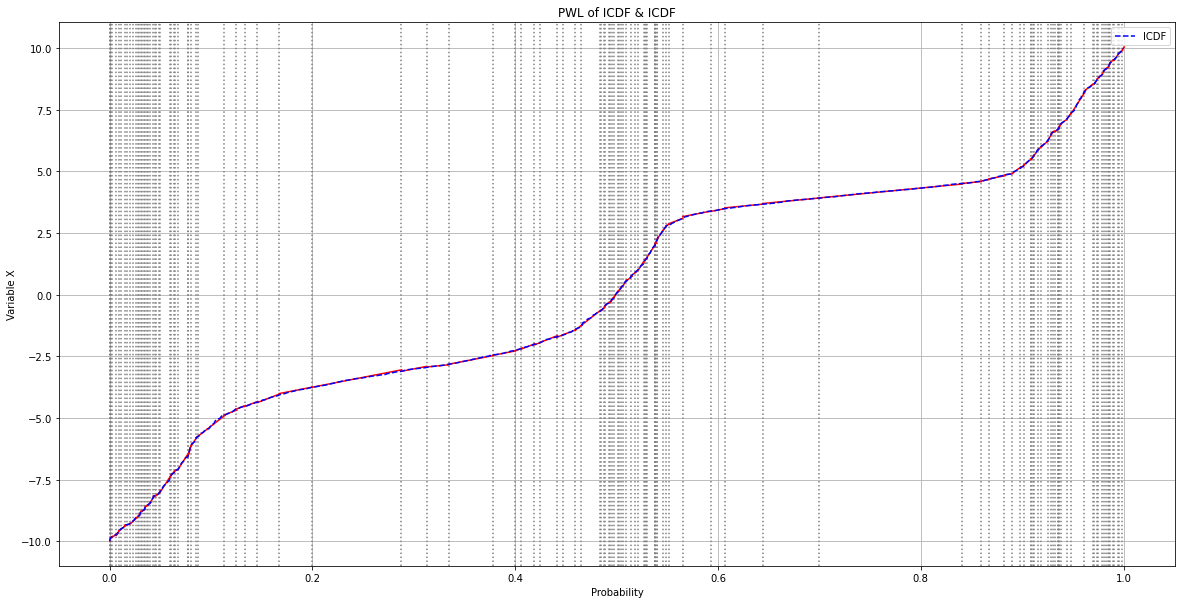

In [59]:
# setting figsize
f1 = plt.figure(figsize=(20,10))


# print boundary
# for i, j in enumerate(All_b, 1):
#     plt.axvline(x = j, color='black', linestyle="-.")
for i in range(len(ans)):
    L = ans[i][3]
    plt.axvline(x = L, color='gray', linestyle=":")
# print the slope intercept
for i in range(len(ans)):
    nL = ans[i][3]
    nR = ans[i][4]
    m = ans[i][0]
    bias = ans[i][2]
    Xans = np.arange(nL, nR + p, p)
    Yans = (2**m)*Xans + bias
    plt.plot(Xans, Yans, color="red")
    
# print pointfunction
plt.plot(xInterp, yInterp, color="blue", label="ICDF", linestyle="--")
plt.title('PWL of ICDF & ICDF')
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

print("total PWL: ",len(ans))
print("All Required ReLU: ", 2*len(ans)-1)